# Importación librerías

In [21]:
# Realizar instalación de MySQL a Python
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [22]:
!python -m pip install --upgrade pip

# Conexión MySQL

In [23]:
import mysql.connector as sql  #Aquí importamos la librería mysql.connector renombrándola como sql.

mydb= sql.connect(        #En este bloque establecemos la conexión, para ello necesitamos el host, user, contraseña y la base de datos en cuestión, en este caso Equip_D.
    host= "212.227.90.6",
    user="EquipoE",
    password="E1q2u3i4p5oE",
    database="Equip_E")
print(mydb)

In [24]:
import pandas as pd               #Aquí importamos varias librerías de Python como Pandas, Matplotlib y Seaborn.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Tourist_Accommodation10032025 = pd.read_sql("SELECT * FROM Tourist_Accommodation", mydb)     #Aquí cargamos las tablas de Equip_E

C:\Users\crist\AppData\Local\Temp\ipykernel_16228\1778371461.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Tourist_Accommodation10032025 = pd.read_sql("SELECT * FROM Tourist_Accommodation", mydb)     #Aquí cargamos las tablas de Equip_E


# Información general del Dataset

In [ ]:
df = Tourist_Accommodation10032025
pd.set_option('display.max_columns', None)
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


In [26]:
df.shape

(10000, 35)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 15000 non-null  int64  
 1   name                         14996 non-null  object 
 2   description                  14790 non-null  object 
 3   host_id                      15000 non-null  int64  
 4   neighbourhood_name           15000 non-null  object 
 5   neighbourhood_district       9111 non-null   object 
 6   room_type                    15000 non-null  object 
 7   accommodates                 15000 non-null  int64  
 8   bathrooms                    14885 non-null  object 
 9   bedrooms                     14893 non-null  object 
 10  beds                         14940 non-null  float64
 11  amenities_list               14975 non-null  object 
 12  price                        14622 non-null  float64
 13  minimum_nights  

In [27]:
df = pd.read_sql("SELECT * FROM Tourist_Accommodation10032025 LIMIT 20000", mydb)
print(len(df))


C:\Users\crist\AppData\Local\Temp\ipykernel_16228\1424502000.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM Tourist_Accommodation10032025 LIMIT 20000", mydb)


15000


In [28]:
duplicados = df[df.duplicated(subset=['apartment_id'], keep=False)]
print(duplicados)


       apartment_id                                               name  \
0             11964                                 A ROOM WITH A VIEW   
2             32347  Explore Cultural Sights from a Family-Friendly...   
13            89776    Modernist flat Downtown Casa Estap� | Barcelona   
14            89954                 Amazing apt in the historic center   
17           103386                Central 2 Bedrooms, 3/5 pers. Wi-Fi   
...             ...                                                ...   
14995      12887516            C�ntrico apartamento a 50m. de la playa   
14996      20220009                          Beautiful room only girls   
14997      17344825         Cozy & Sunny Apartment, with 1 Double Room   
14998      12337767                     Double-room in a peaceful area   
14999      23590761  Modern and nice villa between Pollen�a and Alc...   

                                             description    host_id  \
0      Private bedroom in our attic apar

In [29]:
conteo_por_id = df['apartment_id'].value_counts()
duplicados_frecuencia = conteo_por_id[conteo_por_id > 1]
print(duplicados_frecuencia)


apartment_id
10005342    6
32161182    5
10713417    5
14326808    5
24038577    5
           ..
45962630    2
45980553    2
46480896    2
46499166    2
45157370    2
Name: count, Length: 4974, dtype: int64


In [30]:
conteo_duplicados = df['apartment_id'].duplicated().sum()
print(f"Número de registros duplicados en 'apartment_id': {conteo_duplicados}")


Número de registros duplicados en 'apartment_id': 5350


In [31]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {Tourist_Accommodation10032025.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 15000
Total de duplicados exactos: 0
El número de apartment_id duplicados es: 5350


# Limpieza y modificaciones para el rol de Marketing

In [35]:
# Lista de columnas a convertir en int pero si alguna de ellas tiene valor NaN pasará a 1, ya que todos los alohamientos tienen al menos una cama, una habitación y un baño
columnas_numericas = ["bathrooms", "bedrooms", "beds"]

for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Convertir a número, NaN si hay errores
    df[col].fillna(1, inplace=True)  # Reemplazar NaN con 1
    df[col] = df[col].astype(int)  # Convertir a entero

# Verificar los tipos de datos después de la conversión
print(df[columnas_numericas].dtypes)

bathrooms    int64
bedrooms     int64
beds         int64
dtype: object


C:\Users\crist\AppData\Local\Temp\ipykernel_16228\1584102728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(1, inplace=True)  # Reemplazar NaN con 1
C:\Users\crist\AppData\Local\Temp\ipykernel_16228\1584102728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [36]:
# Convertir columnas a formato datetime
columnas_fechas = ["insert_date", "last_review_date", "first_review_date"]
for col in columnas_fechas:
    df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)

# Verificar que ahora son fechas
print(df[columnas_fechas].dtypes)

insert_date          datetime64[ns]
last_review_date     datetime64[ns]
first_review_date    datetime64[ns]
dtype: object


In [37]:
# Imputaciones
# Columnas numéricas mejor con mediana ya que los outliers nos pueden afectar. Por ejemplo puede haber casas con 50 baños, pero no es lo habitual.
df["minimum_nights"].fillna(df["minimum_nights"].median(), inplace=True)
df["maximum_nights"].fillna(df["maximum_nights"].median(), inplace=True)
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))
# Columnas de disponibilidad
df["availability_30"].fillna(df["availability_30"].mean(), inplace=True)
df["availability_60"].fillna(df["availability_60"].mean(), inplace=True)
df["availability_90"].fillna(df["availability_90"].mean(), inplace=True)
df["availability_365"].fillna(df["availability_365"].mean(), inplace=True)
# Columnas categóricas
df["neighbourhood_district"].fillna("Desconocido", inplace=True)
df["has_availability"].fillna("unknown", inplace=True)
# Columnas de texto
df["name"].fillna("Desconocido", inplace=True)
df["description"].fillna("No disponible", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")

C:\Users\crist\AppData\Local\Temp\ipykernel_16228\2175096406.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["minimum_nights"].fillna(df["minimum_nights"].median(), inplace=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_16228\2175096406.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [38]:
df.isnull().sum()

apartment_id                      0
name                              0
description                       0
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              3881
last_review_date               3884
review_scores_rating           4040
review_scores_accuracy         4053
review_scores_cleanliness      4044
review_scores_checkin          4062
review_scores_communication 

# SARA falta el trato de los duplicados

# Desafío
## Pregunta de Negocio
Analista de Marketing y Estrategia Comercial: ¿Qué características de los alojamientos (comodidades, capacidad y puntuación de la zona) están más relacionadas con los precios en cada ciudad?

### Análisis de Comodidades (amenities_list) y su Relación con el Precio

In [39]:
# Transformar amenities_list en listas reales
df["amenities_list"] = df["amenities_list"].apply(lambda x: x.split(",") if isinstance(x, str) else [])

In [40]:
# Crear una nueva columna con el número de comodidades
df["num_amenities"] = df["amenities_list"].apply(len)

# Ver relación entre número de comodidades y precio
df[["num_amenities", "price"]].corr()


,num_amenities,price
num_amenities,1.000000,0.092279
price,0.092279,1.000000


In [41]:
from collections import Counter
# Contar las comodidades más repetidas
amenities_flat = [amenidad.strip() for lista in df["amenities_list"] for amenidad in lista]
amenities_count = Counter(amenities_flat)
print(amenities_count)

Counter({'Kitchen': 13614, 'Essentials': 13233, 'Washer': 12405, 'TV': 12358, 'Wifi': 12131, 'Hangers': 11629, 'Heating': 10885, 'Iron': 10741, 'Hair dryer': 10618, 'Air conditioning': 8985, 'Shampoo': 7992, 'Hot water': 7922, 'Refrigerator': 6482, 'Family/kid friendly': 6417, 'Dishes and silverware': 6229, 'Microwave': 6060, 'Elevator': 5933, 'Coffee maker': 5860, 'Laptop friendly workspace': 5821, 'Cooking basics': 5360, 'Bed linens': 5357, 'Oven': 4986, 'Host greets you': 4490, 'First aid kit': 4444, 'Stove': 4405, 'Long term stays allowed': 4277, 'Patio or balcony': 3710, 'Internet': 3597, 'Fire extinguisher': 3582, 'Dishwasher': 3505, 'Smoking allowed': 3469, 'Free parking on premises': 3468, 'Pool': 3387, 'Extra pillows and blankets': 3135, 'Dryer': 3038, 'Crib': 3036, 'Private entrance': 2880, 'Free street parking': 2874, 'Cable TV': 2508, 'Luggage dropoff allowed': 2475, 'High chair': 2463, 'Buzzer/wireless intercom': 2274, 'Pets allowed': 2106, 'Paid parking off premises': 208

In [42]:
# Obtener las 10 comodidades más comunes
comodidades_top = [amenity for amenity, _ in amenities_count.most_common(10)]
print(comodidades_top)

['Kitchen', 'Essentials', 'Washer', 'TV', 'Wifi', 'Hangers', 'Heating', 'Iron', 'Hair dryer', 'Air conditioning']


In [43]:
#Crear Variables Binarias para las Comodidades Más Comunes
# Crear una columna por cada comodidad más común (1 si está presente, 0 si no)
for amenidad in comodidades_top:
    df[amenidad] = df["amenities_list"].apply(lambda x: 1 if amenidad in x else 0)

# Verificar que las nuevas columnas se han creado
print(df[comodidades_top + ["price"]].head())

   Kitchen  Essentials  Washer  TV  Wifi  Hangers  Heating  Iron  Hair dryer  \
0        0           1       1   1     1        1        1     1           1   
1        1           1       1   1     1        1        1     1           1   
2        1           1       1   1     1        1        1     1           1   
3        1           1       1   1     1        1        1     1           1   
4        0           1       1   0     1        1        1     1           1   

   Air conditioning  price  
0                 1  400.0  
1                 1  170.0  
2                 1  990.0  
3                 0  400.0  
4                 0  900.0  


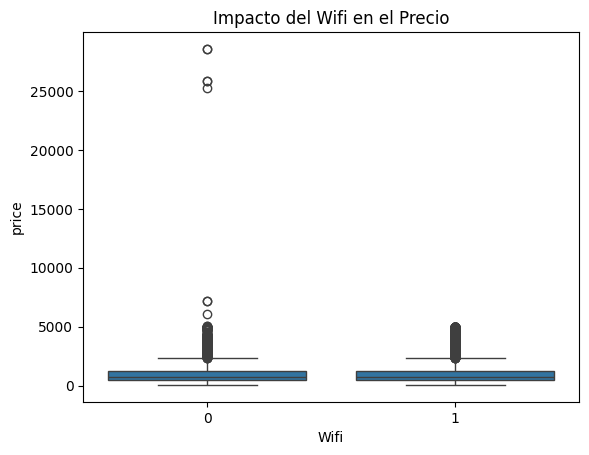

In [44]:
# Comparar el Precio según la Presencia de una Comodidad
sns.boxplot(x=df["Wifi"], y=df["price"])
plt.title("Impacto del Wifi en el Precio")
plt.show()

### Relación entre Capacidad (accommodates) y Precio

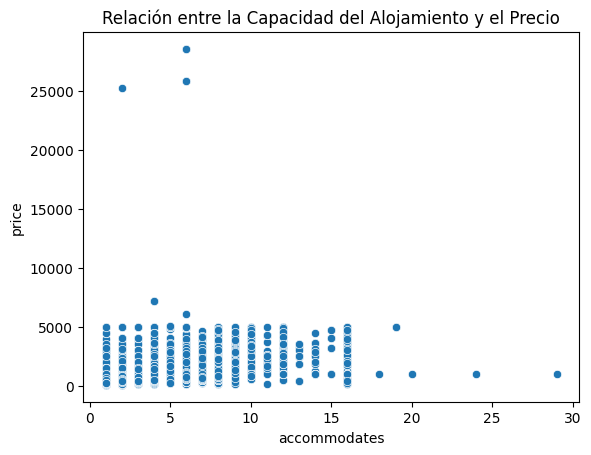

In [45]:
sns.scatterplot(x=df["accommodates"], y=df["price"])
plt.title("Relación entre la Capacidad del Alojamiento y el Precio")
plt.show()

In [46]:
correlacion_capacidad = df[["accommodates", "price"]].corr()
print(correlacion_capacidad)


              accommodates     price
accommodates      1.000000  0.494529
price             0.494529  1.000000


### Relación entre review_scores_location y Precio

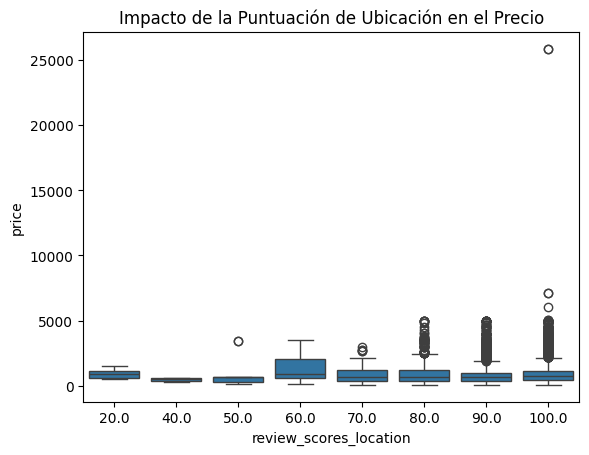

In [51]:
sns.boxplot(x=df["review_scores_location"], y=df["price"])
plt.title("Impacto de la Puntuación de Ubicación en el Precio")
plt.show()

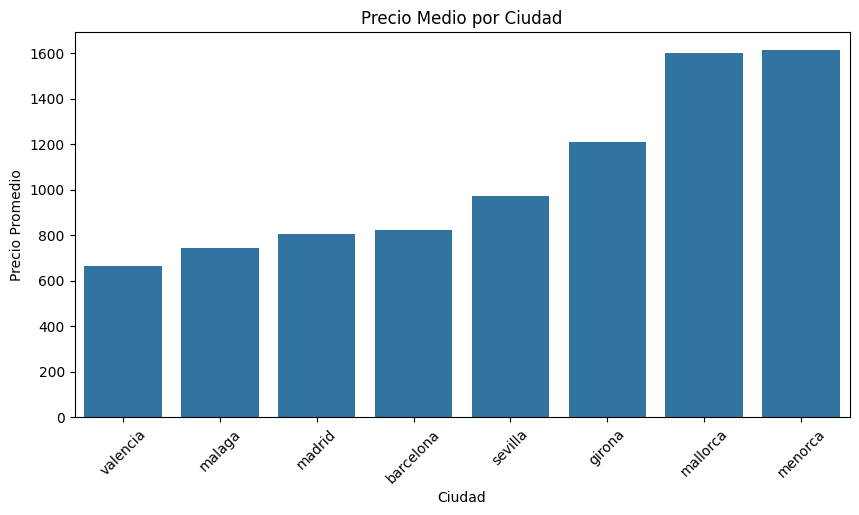

In [53]:
#Comparar precios promedio por ciudad para entender cómo varían los precios entre ciudades
# Graficar
df_ciudades = df.groupby("city")["price"].mean().sort_values()

# Graficar
plt.figure(figsize=(10,5))
sns.barplot(x=df_ciudades.index, y=df_ciudades.values)
plt.xticks(rotation=45)
plt.title("Precio Medio por Ciudad")
plt.ylabel("Precio Promedio")
plt.xlabel("Ciudad")
plt.show()


In [54]:
# Analizar la cantidad de alojamientos por ciudad
# Para ver si el precio medio está influenciado por una baja cantidad de anuncios en ciertas ciudades:
df_ciudades_count = df["city"].value_counts()
print(df_ciudades_count)


city
barcelona    4247
madrid       3289
mallorca     2490
girona       2289
sevilla       790
malaga        787
valencia      785
menorca       323
Name: count, dtype: int64


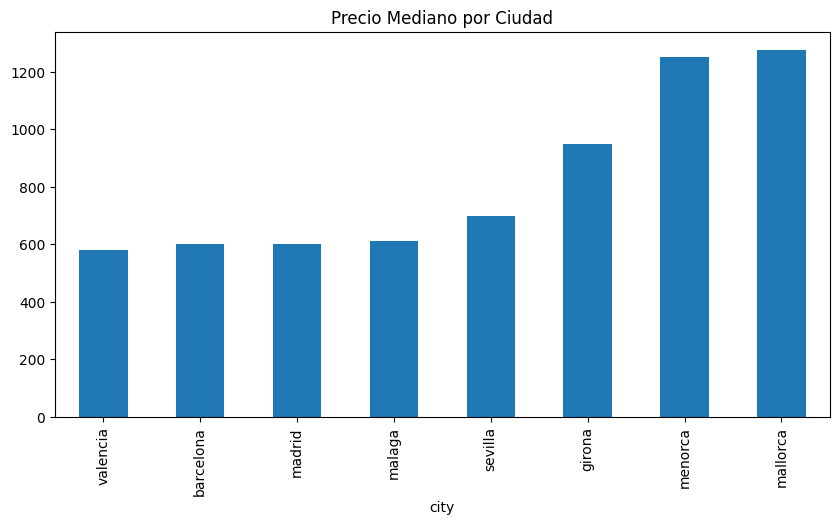

In [55]:
# Comparar los precios medianos en lugar de la media
# La media puede verse afectada por outliers, por lo que la mediana puede ser más representativa:
df_ciudades_median = df.groupby("city")["price"].median().sort_values()
df_ciudades_median.plot(kind="bar", figsize=(10,5), title="Precio Mediano por Ciudad")
plt.show()

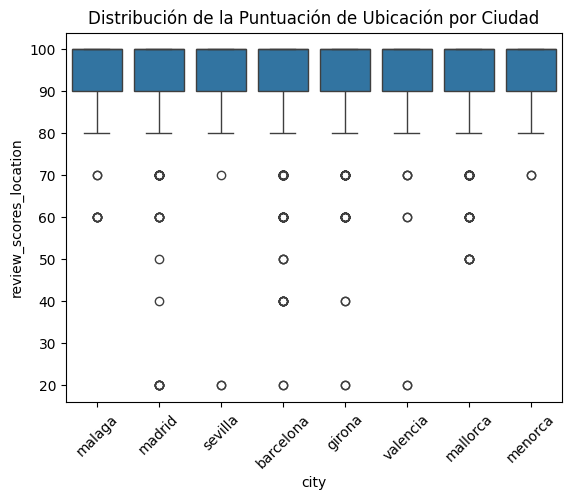

In [56]:
#Evaluar la relación entre precio y puntuación de ubicación (review_scores_location) por ciudad
sns.boxplot(x="city", y="review_scores_location", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de la Puntuación de Ubicación por Ciudad")
plt.show()

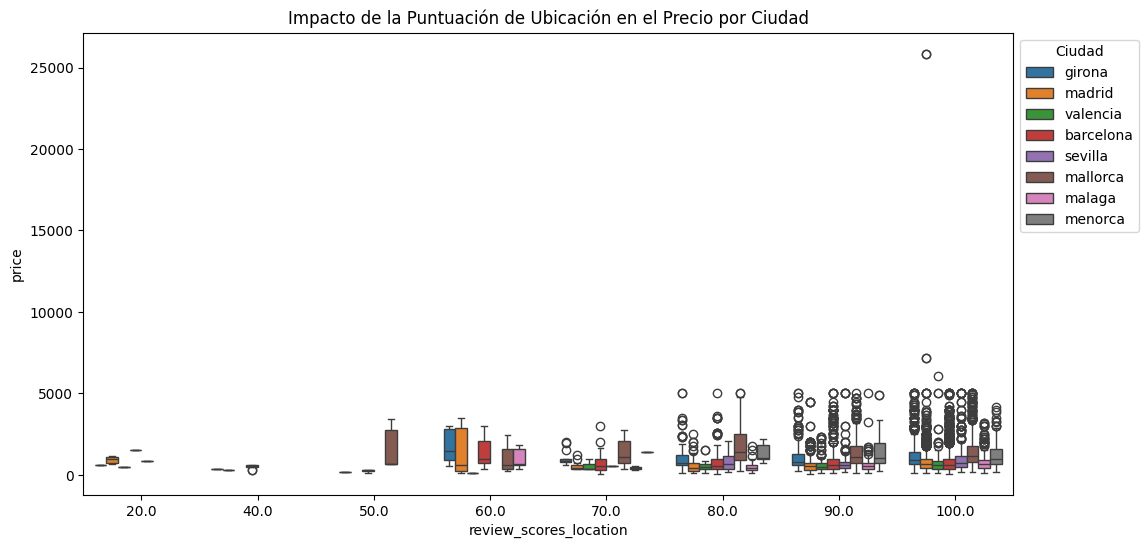

In [57]:
#Ver relación de review_scores_location y price por ciudad, y si la puntuación de ubicación afecta el precio en algunas ciudades más que en otras
plt.figure(figsize=(12,6))
sns.boxplot(x="review_scores_location", y="price", hue="city", data=df)
plt.title("Impacto de la Puntuación de Ubicación en el Precio por Ciudad")
plt.legend(title="Ciudad", bbox_to_anchor=(1,1))
plt.show()

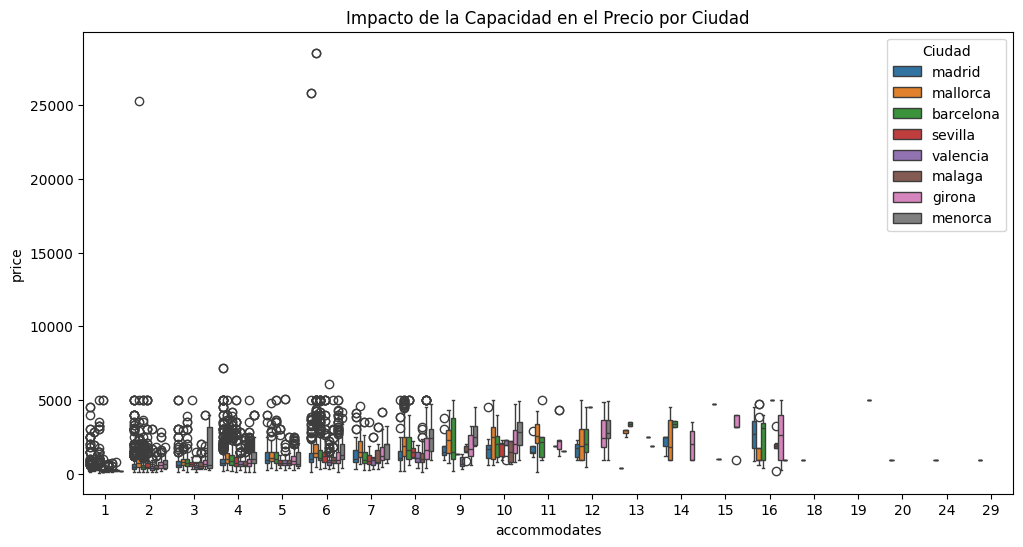

In [58]:
#Evaluar la capacidad (accommodates) en cada ciudad nos permitirá ver si la capacidad de huéspedes afecta el precio de forma diferente según la ciudad.
plt.figure(figsize=(12,6))
sns.boxplot(x="accommodates", y="price", hue="city", data=df)
plt.title("Impacto de la Capacidad en el Precio por Ciudad")
plt.legend(title="Ciudad", bbox_to_anchor=(1,1))
plt.show()

In [59]:
#Evaluar comodidades (amenities_list) por ciudad si queremos ver qué comodidades son más frecuentes en cada ciudad
from collections import Counter

# Contar comodidades más usadas por ciudad
comodidades_por_ciudad = df.groupby("city")["amenities_list"].sum().apply(lambda x: Counter(x).most_common(5))

# Mostrar las comodidades más comunes en cada ciudad
print(comodidades_por_ciudad)


city
barcelona    [(Essentials, 3406), (Kitchen, 3268), (Washer,...
girona       [(TV, 1948), (Kitchen, 1898), (Washer, 1735), ...
madrid       [(Essentials, 2505), (Kitchen, 2421), (Wifi, 2...
malaga       [(Essentials, 650), (Kitchen, 648), (TV, 624),...
mallorca     [(Kitchen, 1856), (TV, 1854), (Washer, 1789), ...
menorca      [(Kitchen, 264), (Washer, 246), (Essentials, 2...
sevilla      [(Essentials, 656), (Wifi, 654), (Hangers, 638...
valencia     [(Essentials, 550), (Wifi, 514), (Kitchen, 504...
Name: amenities_list, dtype: object


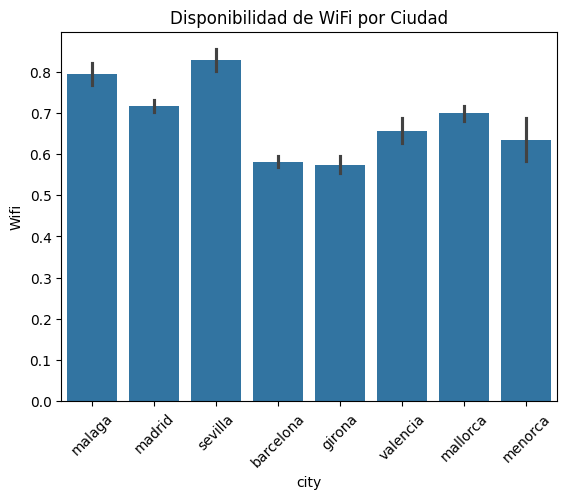

In [60]:
sns.barplot(x="city", y="Wifi", data=df)
plt.title("Disponibilidad de WiFi por Ciudad")
plt.xticks(rotation=45)
plt.show()